<p style="padding:10px;
    background-color:black;
    color:white;
    font-family:computermodern;
    font-size:300%;
    text-align:center;
    border-radius:20px 20px">Cat And Dog Image Classification || SVM | LBP</p>

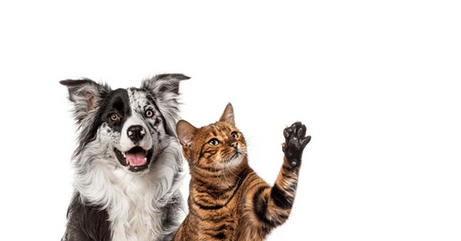

<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">Import Libraries</p>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import os
import cv2

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score

<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">Loading DataSet</p>

In [201]:
def read_data(data_dir):
    images=[]
    labels=['cats','dogs']
    label=[]
    for i in labels:
        path=os.path.join(data_dir,i)
        for img in os.listdir(path):
            image=cv2.imread(os.path.join(path,img))
            if image is not None:
                resized_img=cv2.resize(image,(150,150))
                images.append(resized_img)
                label.append(labels.index(i))
        print(f'loaded category:{i} successfully')
    return images , label

In [203]:
data_dir=r"E:\NTI\DS"
data_img, data_label=read_data(data_dir)

loaded category:cats successfully
loaded category:dogs successfully


In [7]:
print(data_img)

[array([[[ 40,  44,  39],
        [ 43,  44,  40],
        [ 48,  45,  41],
        ...,
        [160, 178, 178],
        [176, 204, 208],
        [163, 197, 200]],

       [[ 40,  45,  40],
        [ 42,  43,  39],
        [ 46,  43,  39],
        ...,
        [158, 173, 174],
        [168, 194, 199],
        [164, 195, 200]],

       [[ 38,  42,  37],
        [ 37,  38,  34],
        [ 40,  37,  33],
        ...,
        [155, 167, 171],
        [163, 187, 193],
        [168, 197, 204]],

       ...,

       [[ 23,  22,  24],
        [ 20,  19,  21],
        [ 18,  17,  19],
        ...,
        [ 33,  38,  53],
        [ 43,  49,  62],
        [ 23,  29,  40]],

       [[ 29,  28,  30],
        [ 23,  22,  24],
        [ 20,  20,  22],
        ...,
        [ 25,  30,  45],
        [ 20,  26,  39],
        [ 30,  36,  47]],

       [[ 29,  29,  31],
        [ 22,  21,  23],
        [ 19,  18,  20],
        ...,
        [ 27,  34,  49],
        [ 29,  37,  50],
        [ 25,  35,  44]

In [8]:
print(data_label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [9]:
#Random Sample Of DataSet
def show_data(data,labels):
    fig=plt.figure(figsize=(16,5))
    plt.suptitle('Random Sample Of DataSet',fontsize=20)
    for i in range(1,21):
        plt.subplot(2,10,i)
        index=np.random.randint(0,len(data_img))
        plt.imshow(data[index])
        plt.axis('off')
        if labels[index]==0:
            plt.title('Cat')
        else:
            plt.title('Dog')
    plt.show()

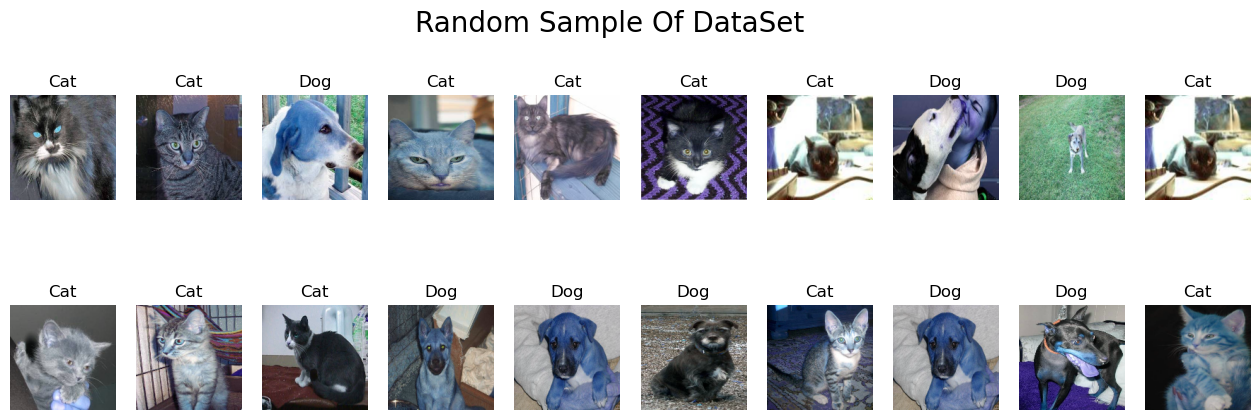

In [10]:
show_data(data_img, data_label)

<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">DataFrame</p>

In [12]:
flatten_data=[]
for img in data_img:
    flatten_data.append(img.flatten())

flatten_data_arr=np.array(flatten_data)

In [13]:
data=pd.DataFrame(flatten_data_arr)

In [14]:
data['Target']=data_label

In [15]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,40,44,39,43,44,40,48,45,41,50,...,27,34,49,29,37,50,25,35,44,0
1,42,33,29,27,16,12,35,23,19,56,...,4,192,194,6,184,186,3,167,172,0
2,239,241,235,244,246,236,253,253,240,214,...,242,214,198,233,208,192,243,218,202,0
3,59,77,87,54,71,78,45,59,63,43,...,180,187,184,175,184,181,176,186,183,0
4,29,78,92,34,84,98,37,90,103,40,...,85,104,101,82,101,98,75,99,95,0


In [18]:
#missing values
data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
67496     0
67497     0
67498     0
67499     0
Target    0
Length: 67501, dtype: int64

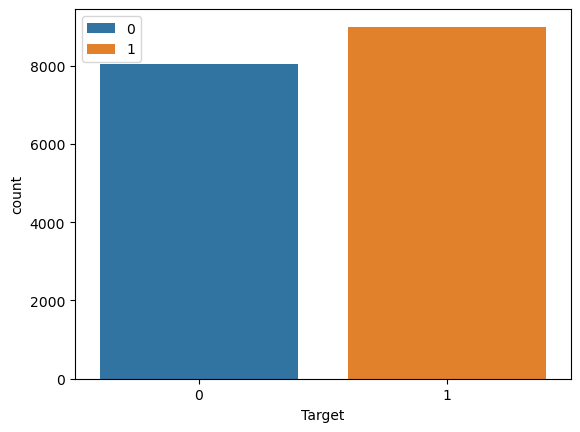

In [19]:
sns.countplot(data=data,x=data.Target,hue=data.Target)
plt.legend()
plt.show()

<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">SVC Model</p>

In [93]:
X=data.iloc[:,:-1]
Y=data.Target

In [133]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, train_size=0.9, random_state=42)

In [135]:
model=SVC(kernel='linear',random_state=32)

In [137]:
model.fit(x_train,y_train)

SVC(kernel='linear', random_state=32)

<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">Model Evaluation</p>

In [143]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

print("Train Accuracy:",f'{accuracy_score(y_train,train_pred)*100}% accurate')
print("Test Accuracy:",f'{accuracy_score(y_test,test_pred)*100}% accurate')

print("Classification report:\n",classification_report(y_test,test_pred, target_names=['cat', 'dog']))

Train Accuracy: 100.0% accurate
Test Accuracy: 81.25% accurate
Classification report:
               precision    recall  f1-score   support

         cat       0.78      0.88      0.82         8
         dog       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16



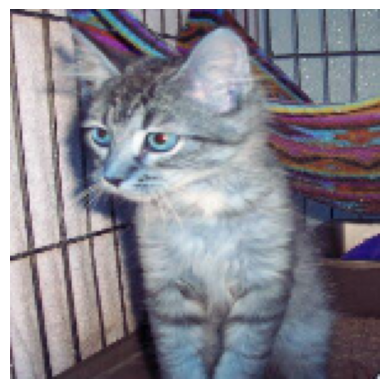

In [148]:
test_image=cv2.imread(os.path.join(r"E:\NTI\DS\cats","cat.2.jpg"))

resized_test_img=cv2.resize(test_image,(150,150))

plt.imshow(resized_test_img)
plt.axis('off')
plt.show()

In [158]:
flatten_test_img=[resized_test_img.flatten()]
flatten_test_img

[array([ 49,  47,  61, ..., 195, 197, 209], dtype=uint8)]

In [164]:
y_test_pred=model.predict(flatten_test_img)
if y_test_pred[0]==0:
    print("Class: Cat")
else:
    print("Class: Dog")

Class: Cat


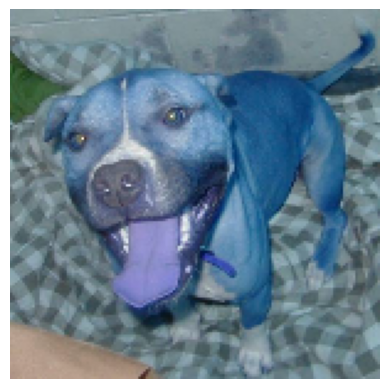

In [168]:
test_image2=cv2.imread(os.path.join(r"E:\NTI\DS\dogs","dog.6.jpg"))
resized_test_img2=cv2.resize(test_image2,(150,150))

plt.imshow(resized_test_img2)
plt.axis('off')
plt.show()

In [172]:
flatten_test_img2=[resized_test_img2.flatten()]
flatten_test_img2

[array([133, 150, 159, ..., 122, 139, 148], dtype=uint8)]

In [174]:
y_test_pred2=model.predict(flatten_test_img2)
if y_test_pred2[0]==0:
    print("Class: Cat")
else:
    print("Class: Dog")

Class: Dog


<p style="padding:10px;
    background-color:#82e0aa;
    color:black;
    font-family:computermodern;
    font-size:200%;
    text-align:center;
    border-radius:20px 20px">Feature Extraction LBP | Local Binary Pattern</p>

In [210]:
#import library
from skimage.feature import local_binary_pattern

In [531]:
def load_data(data_dir):
    features=[]
    labels=['cats','dogs']
    label=[]
    for i in labels:
        path=os.path.join(data_dir,i)
        for img in os.listdir(path):
            image=cv2.imread(os.path.join(path,img))
            if image is not None:
                #Gray Scale
                GrayScale_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
                #resized image
                resized_img=cv2.resize(GrayScale_img,(150,150))
                
                # Extracting features of an image using LBP
                radius=4
                n_points=8*radius
                METHOD='uniform'
                lbp=local_binary_pattern(resized_img, n_points, radius, method=METHOD)
                features.append(lbp)
                label.append(labels.index(i))
        print(f'loaded category:{i} successfully')
    return features, label
                

In [533]:
data_dir=r"E:\NTI\DS"
Data_img, Data_label=load_data(data_dir)

loaded category:cats successfully
loaded category:dogs successfully


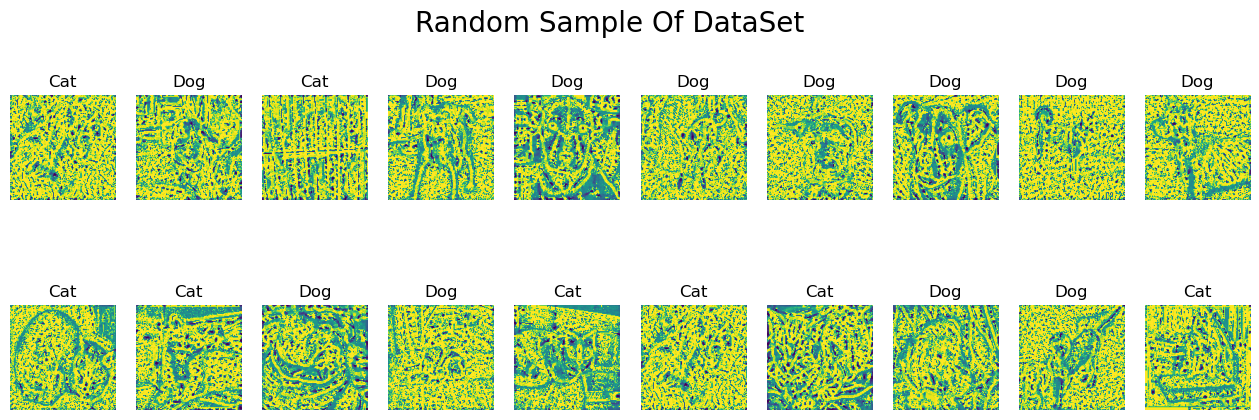

In [534]:
show_data(Data_img, Data_label)

In [535]:
#flatten lbp dataset
Flatten_Data=[]
for img in Data_img:
    Flatten_Data.append(img.flatten())

#lbp_DataFrame
LBP_Data=pd.DataFrame(Flatten_Data)

In [536]:
LBP_Data['Target']=Data_label

In [537]:
LBP_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,Target
0,33.0,33.0,33.0,33.0,0.0,33.0,33.0,33.0,33.0,33.0,...,33.0,33.0,0.0,0.0,0.0,4.0,33.0,10.0,9.0,0
1,9.0,11.0,12.0,13.0,15.0,15.0,15.0,15.0,14.0,14.0,...,17.0,17.0,33.0,9.0,5.0,2.0,1.0,5.0,9.0,0
2,0.0,1.0,0.0,3.0,15.0,17.0,33.0,12.0,33.0,33.0,...,13.0,33.0,33.0,33.0,33.0,9.0,7.0,10.0,4.0,0
3,4.0,4.0,33.0,33.0,33.0,33.0,33.0,33.0,14.0,33.0,...,33.0,33.0,33.0,33.0,17.0,13.0,0.0,2.0,2.0,0
4,9.0,10.0,11.0,12.0,12.0,13.0,14.0,14.0,15.0,15.0,...,16.0,15.0,16.0,15.0,15.0,13.0,11.0,10.0,9.0,0


In [538]:
#splitting LBP_Dataset
x_lbp=LBP_Data.iloc[:,:-1]
y_lbp=LBP_Data.Target
x_train_lbp, x_test_lbp, y_train_lbp, y_test_lbp=train_test_split(x_lbp, y_lbp, train_size=0.9, random_state=42)

In [539]:
SVC_Model=SVC(kernel='linear', random_state=32)
SVC_Model.fit(x_train_lbp, y_train_lbp)

SVC(kernel='linear', random_state=32)

In [540]:
#model evaluation
lbp_train_pred=SVC_Model.predict(x_train_lbp)
lbp_test_pred =SVC_Model.predict(x_test_lbp)

print("Train Accuracy:",f'{accuracy_score(y_train_lbp, lbp_train_pred)*100}% accurate')
print("Test Accuracy:",f'{accuracy_score(y_test_lbp, lbp_test_pred)*100}% accurate')

print("Classification report:\n",classification_report(y_test_lbp, lbp_test_pred, target_names=['cat', 'dog']))

Train Accuracy: 100.0% accurate
Test Accuracy: 75.0% accurate
Classification report:
               precision    recall  f1-score   support

         cat       0.75      0.75      0.75         8
         dog       0.75      0.75      0.75         8

    accuracy                           0.75        16
   macro avg       0.75      0.75      0.75        16
weighted avg       0.75      0.75      0.75        16

